<a href="https://colab.research.google.com/drive/1VI3gwGzuyzSrALnG31f_6esY8qqdCmNS?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Resumo

Modelos de inteligência artificial são cada vez mais comuns em vários aspectos do dia a dia. Não só nos casos mais emblemáticas, mas também para casos corriqueiros como em sistemas de recomendação em sites de compras. Nesse sentido, é muito importante o entendimento de como esses modelos funcionam por parte dos desenvolvedores. Contudo, o uso massivo de bibliotecas para utilização desses modelos pode desfavorecer esse entendimento. Assim, esse trabalho traz a definição e demonstração formal das funções de ativação em modelos de aprendizado de máquina. Esse é um ponto fundamental para a introdução do assunto à novos desenvolvedores e cientistas que trabalharão na área. A descrição formal se aplica às clássicas funções ReLU, Sigmóide, tangente hiperbólica, softmax e gradiente descendente. Além disso, também são discutidos o impacto dessas funções no modelo LeNet-5 aplicado à base de dados MNIST.

## I. Bibliotecas e definições gerais

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 6, 4
rcParams['font.size'] = 10
rcParams['figure.dpi'] = 300

## II. Aplicação para reconhecimento de imagens de dígitos manuscritos do MNIST  

Nesta seção, aplicamos o LeNet para reconhecer imagens de dígitos manuscritos do MNIST. Essa rede é construída na plataforma Keras.


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## III. Introdução ao modelo

LeNet (ou LeNet-5) é uma estrutura de rede neural convolucional proposta por Yann LeCun, Léon Bottou, Yoshua Bengio e Patrick Haffner em 1989. O principal objetivo dessa rede é reconhecer dígitos manuscritos em imagens. Ela foi aplicada com sucesso para identificar números manuscritos de CEP fornecidos pelo Serviço Postal dos EUA [1].  


## IV. Arquitetura da LeNet

LeNet consiste em 2 partes:  
- A primeira parte inclui duas camadas convolucionais e duas camadas de pooling, dispostas alternadamente.  
- A segunda parte consiste em três camadas totalmente conectadas.  


A arquitetura do LeNet é descrita pela seguinte figura:  
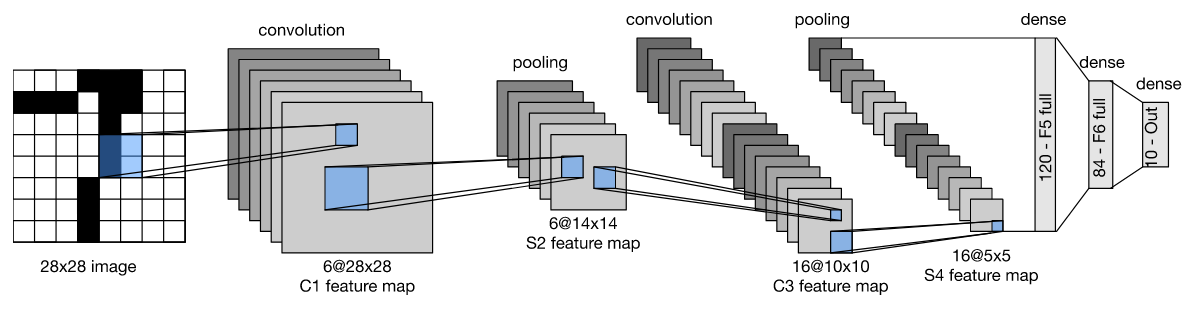

Na figura acima, Cx, Sx e Fx correspondem, respectivamente, à camada convolucional, camada de subamostragem (também conhecida como camada de pooling) e camada totalmente conectada, onde x denota o índice da camada.  

- A entrada são imagens de tamanho 28 × 28.  
- C1 é a primeira camada convolucional, com 6 kernels de convolução de tamanho 5 × 5.  
- S2 é a camada de pooling que gera 6 canais de imagens de 14 × 14. O tamanho da janela de pooling, neste caso, é uma matriz quadrada de 2 × 2.  
- C3 é uma camada convolucional com 16 kernels de convolução de tamanho 5 × 5. Assim, a saída dessa camada são 16 mapas de características de tamanho 10 × 10.  
- S4 é uma camada de pooling com uma janela de pooling de tamanho 2 × 2. Dessa forma, a dimensão das imagens é reduzida pela metade, resultando em 16 mapas de características de tamanho 5 × 5.  
- C5 é a camada convolucional com 120 kernels de convolução de tamanho 5 × 5. Como as entradas dessa camada têm o mesmo tamanho que o kernel, o tamanho da saída dessa camada é 1 × 1. O número de canais na saída é igual ao número de canais dos kernels, que é 120. Assim, a saída dessa camada são 120 mapas de características de tamanho 1 × 1.  
- F6 é uma camada totalmente conectada com 84 neurônios, todos conectados à saída de C5.  
- A camada de saída consiste em 10 neurônios, correspondendo ao número de classes (números de 0 a 9).  

In [ ]:
def create_lenet(activation_func):
    model = Sequential([
        Conv2D(6, kernel_size=(5, 5), activation=activation_func, input_shape=(28, 28, 1), padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(16, kernel_size=(5, 5), activation=activation_func, padding='valid'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(120, activation=activation_func),
        Dense(84, activation=activation_func),
        Dense(10, activation='softmax')  # Softmax na camada de saída
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## V. Função auxiliares

Função para imprimir a matriz de confusão

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, linewidths = 0.1, linecolor = 'gray', fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.xlabel('Classes previstas')
    plt.ylabel('Classes verdadeiras')
    plt.title(f'Matriz de Confusão - {title}')
    plt.savefig('CM_' + title + '.pdf', bbox_inches='tight')
    plt.show()

In [ ]:
def display_softmax_distributions(y_pred, num_samples=5):
    print("\nDistribuições de probabilidade Softmax em amostras aleatórias:")
    indices = np.random.choice(len(y_pred), num_samples, replace=False)
    for idx in indices:
        print(f"Amostra {idx} - Distribuição de probabilidades: {y_pred[idx]} -> Classe prevista: {np.argmax(y_pred[idx])}")

In [ ]:
def plot_function(x, y, name, label):
    plt.plot(x, y, label=label)
    plt.title('Gráfico da Função ' + name)
    plt.xlabel(r'Valores de $x$')
    plt.ylabel(label)
    #plt.grid(True)
    #plt.axhline(0, color='black',linewidth=0.5)
    #plt.axvline(0, color='black',linewidth=0.5)
    #plt.legend()
    plt.savefig('Func_' + name + '.pdf', bbox_inches='tight')
    plt.show()


Função para calcular e exibir os gradientes da última camada (Softmax)

In [ ]:
def display_gradients(model, x_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(x_batch, training=True)
        loss_value = tf.keras.losses.categorical_crossentropy(y_batch, predictions)
    grads = tape.gradient(loss_value, model.trainable_variables[-2:])  # Última camada densa e softmax
    print("\nGradientes (última camada):")
    for var, grad in zip(model.trainable_variables[-2:], grads):
        print(f"Variável: {var.name}, Gradiente médio: {tf.reduce_mean(grad).numpy()}")

In [ ]:
def softmax(x):
# Calculando o exponencial de cada elemento
    exp_x = np.exp(x)

# Calculando soma de exponenciais
    sum_exp_x = np.sum(exp_x)

# Calculando probabilidades
    softmax_probs = exp_x / sum_exp_x

    return softmax_probs

Função de tangente hiperbólica


In [ ]:
# Define a função tanh (tangente hiperbólica)
def tanh(x):
    return np.tanh(x)

Função Sigmóide

In [ ]:
# Definindo a função sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Função ReLU (Rectified Linear Unit)

In [ ]:
# Definindo a função ReLU (Rectified Linear Unit)
def relu(x):
    return np.maximum(0, x)

In [ ]:
def run_experiment(activation_func, results, name):
    print(f"\nTreinando modelo com ativação: {activation_func}")
    model = create_lenet(activation_func)
    model.fit(x_train, y_train, epochs=5, batch_size=100, verbose=1, validation_data=(x_test, y_test))
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
    results[activation_func] = test_accuracy
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    if activation_func == 'relu':
        display_softmax_distributions(y_pred)

    print("\nVisualização dos gradientes com a função de ativação:", activation_func)
    display_gradients(model, x_test[:100], y_test[:100])
    print(f"\nMatriz de confusão para {activation_func}:")
    plot_confusion_matrix(y_true, y_pred_classes, name)

    return results

## VI. Main

Testa da função softmax.

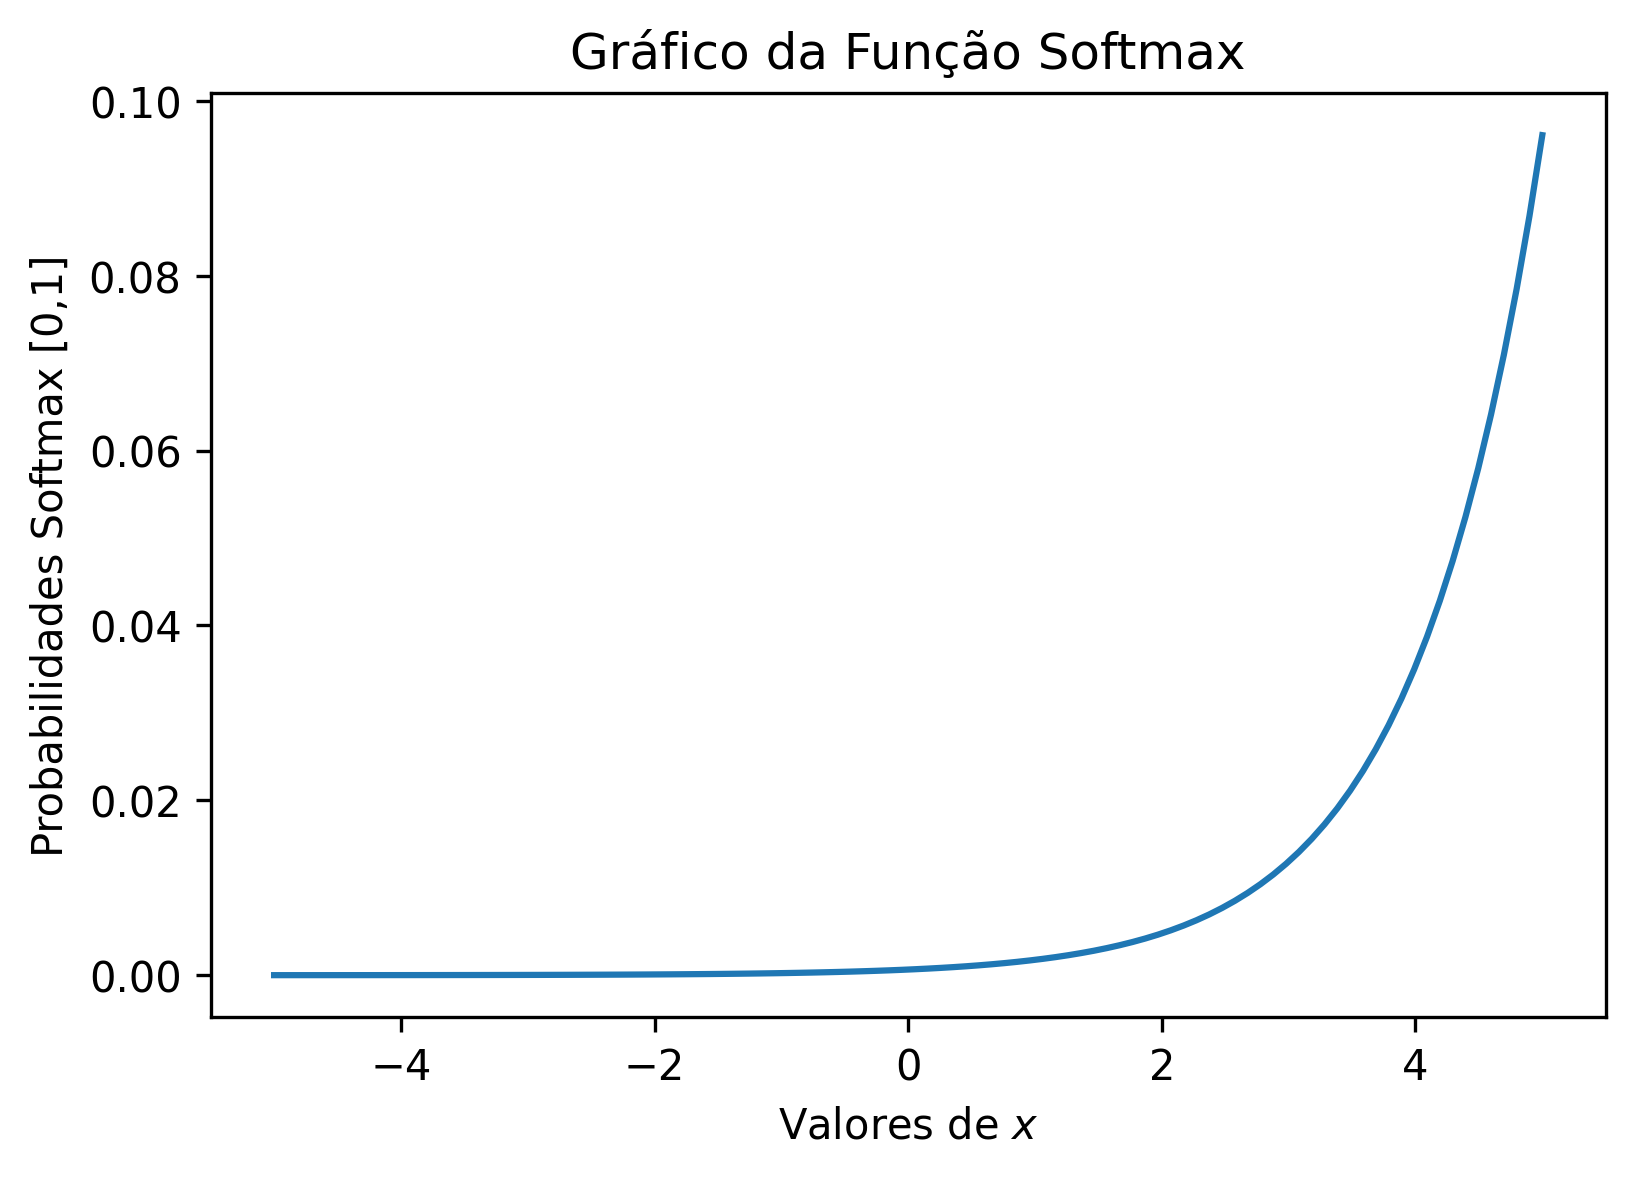

In [ ]:
activation_functions = ['relu', 'sigmoid', 'tanh']
results = {}

# Gerando valores para x
x = np.linspace(-5, 5, 100)

# Calculando softmax para os valores de x
y = softmax(x)


plot_function(x, y, 'Softmax', 'Probabilidades Softmax [0,1]')

Teste da função ReLU

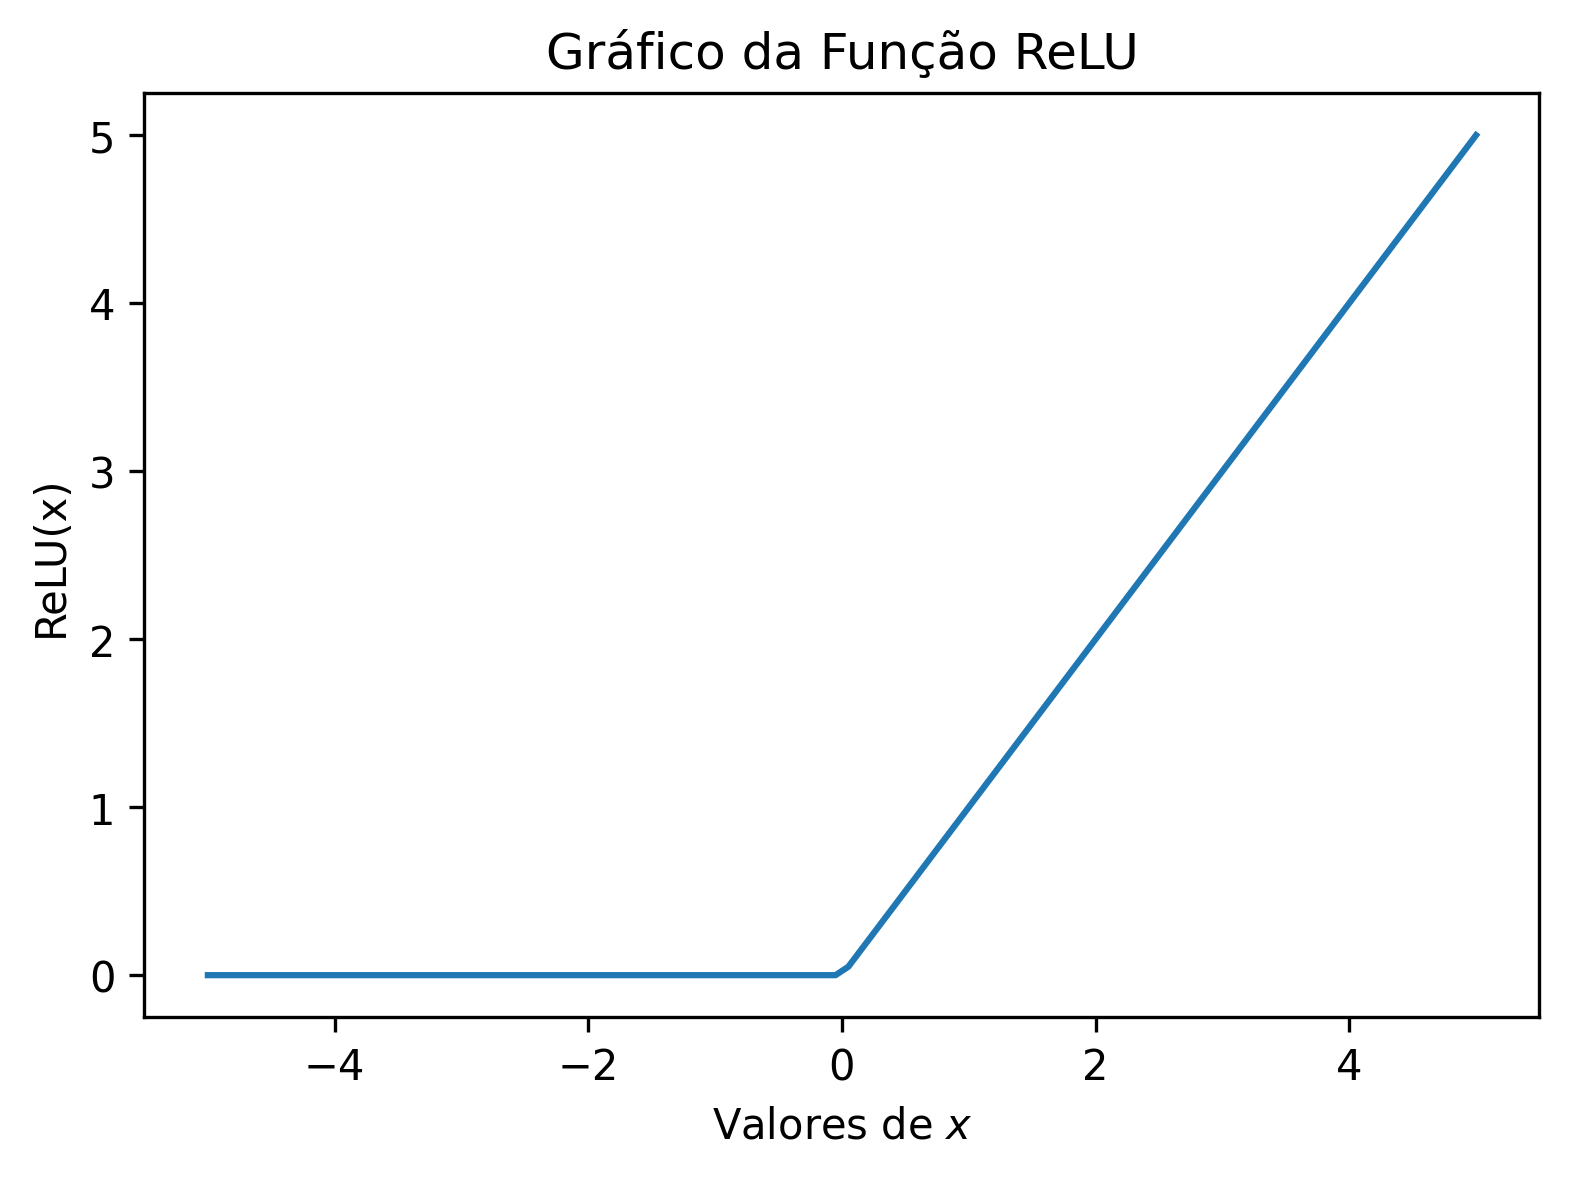


Treinando modelo com ativação: relu


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 45s 67ms/step - accuracy: 0.8391 - loss: 0.5752 - val_accuracy: 0.9703 - val_loss: 0.0908
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 36s 61ms/step - accuracy: 0.9736 - loss: 0.0868 - val_accuracy: 0.9828 - val_loss: 0.0522
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.9832 - loss: 0.0547 - val_accuracy: 0.9864 - val_loss: 0.0417
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 0.9876 - val_loss: 0.0363
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9895 - loss: 0.0328 - val_accuracy: 0.9871 - val_loss: 0.0380
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9831 - loss: 0.0484
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Distribuições de probabilidade Softmax em amostras aleatórias:
Amostra 4995 - Distribuição de probabilidades: [9.2537775e-05 2.5593568e-02 9.7040194e-01 1.7448569e-03 2.1676865e-07
 9.8723986e-06 3.8848957e-06 2.1003913e-03 4.9239094e-05 

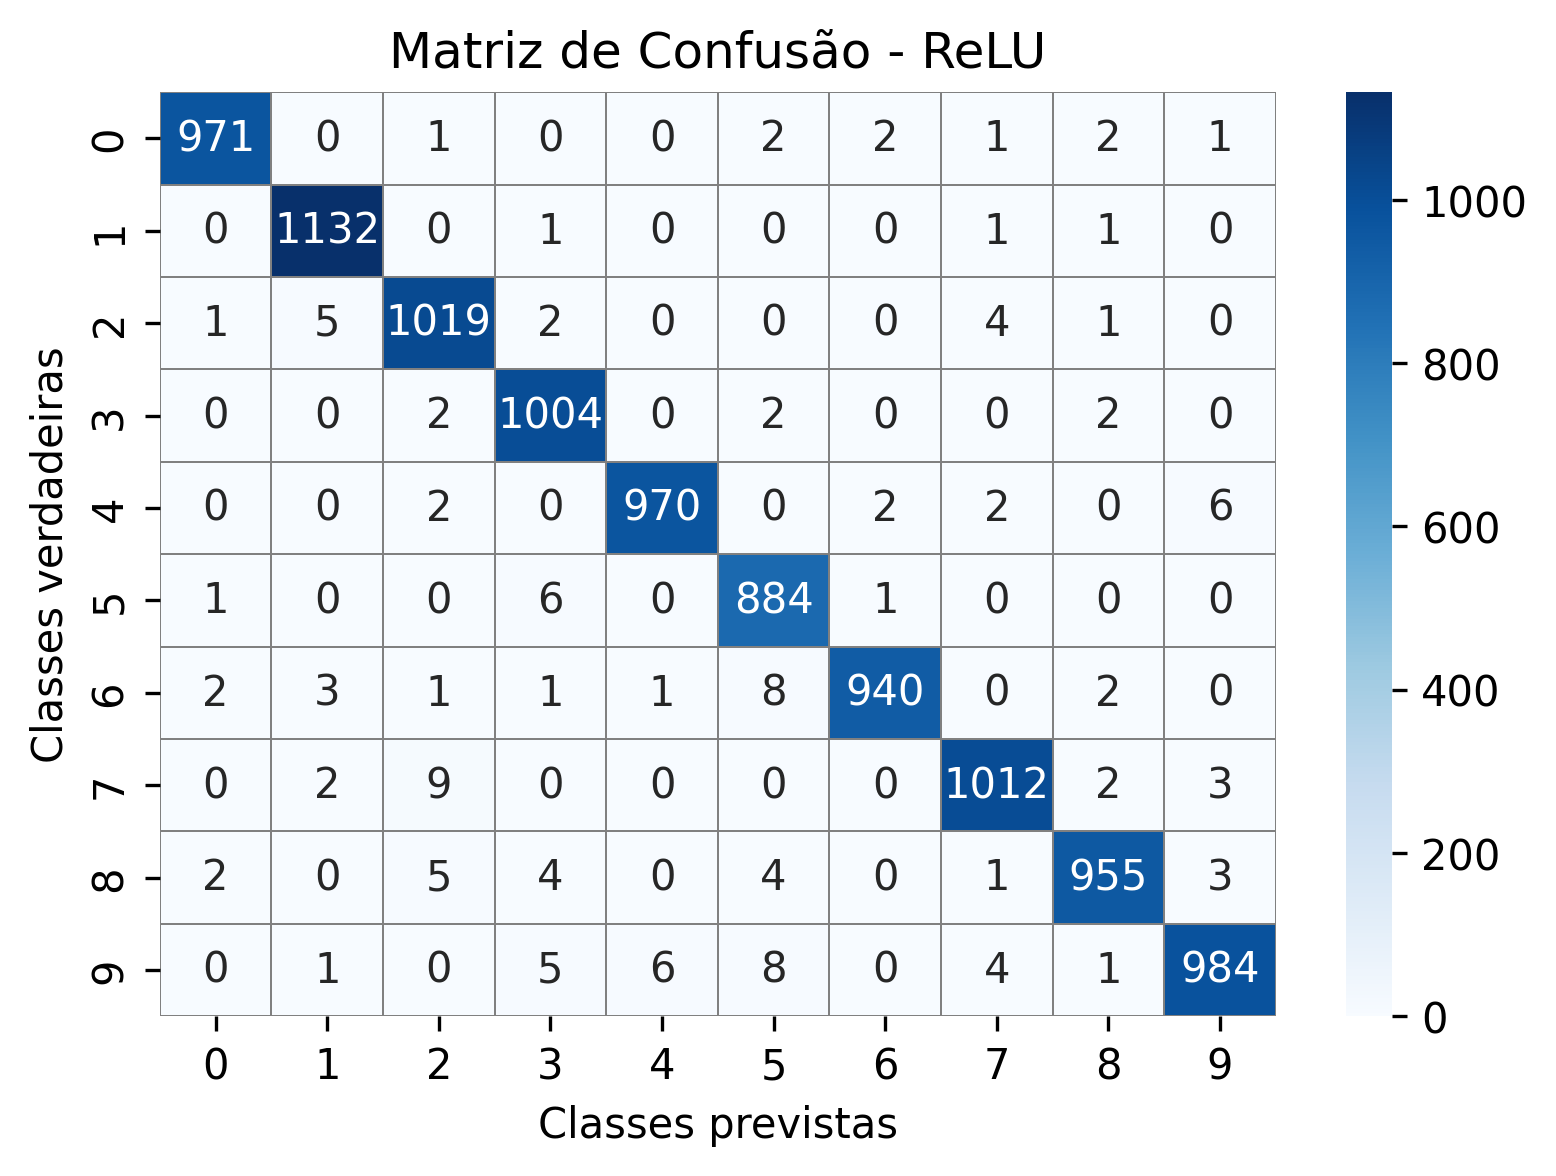

In [ ]:
y = relu(x)
plot_function(x, y, 'ReLU', 'ReLU(x)')
results = run_experiment(activation_functions[0], results, 'ReLU')

Teste da função Sigmóid

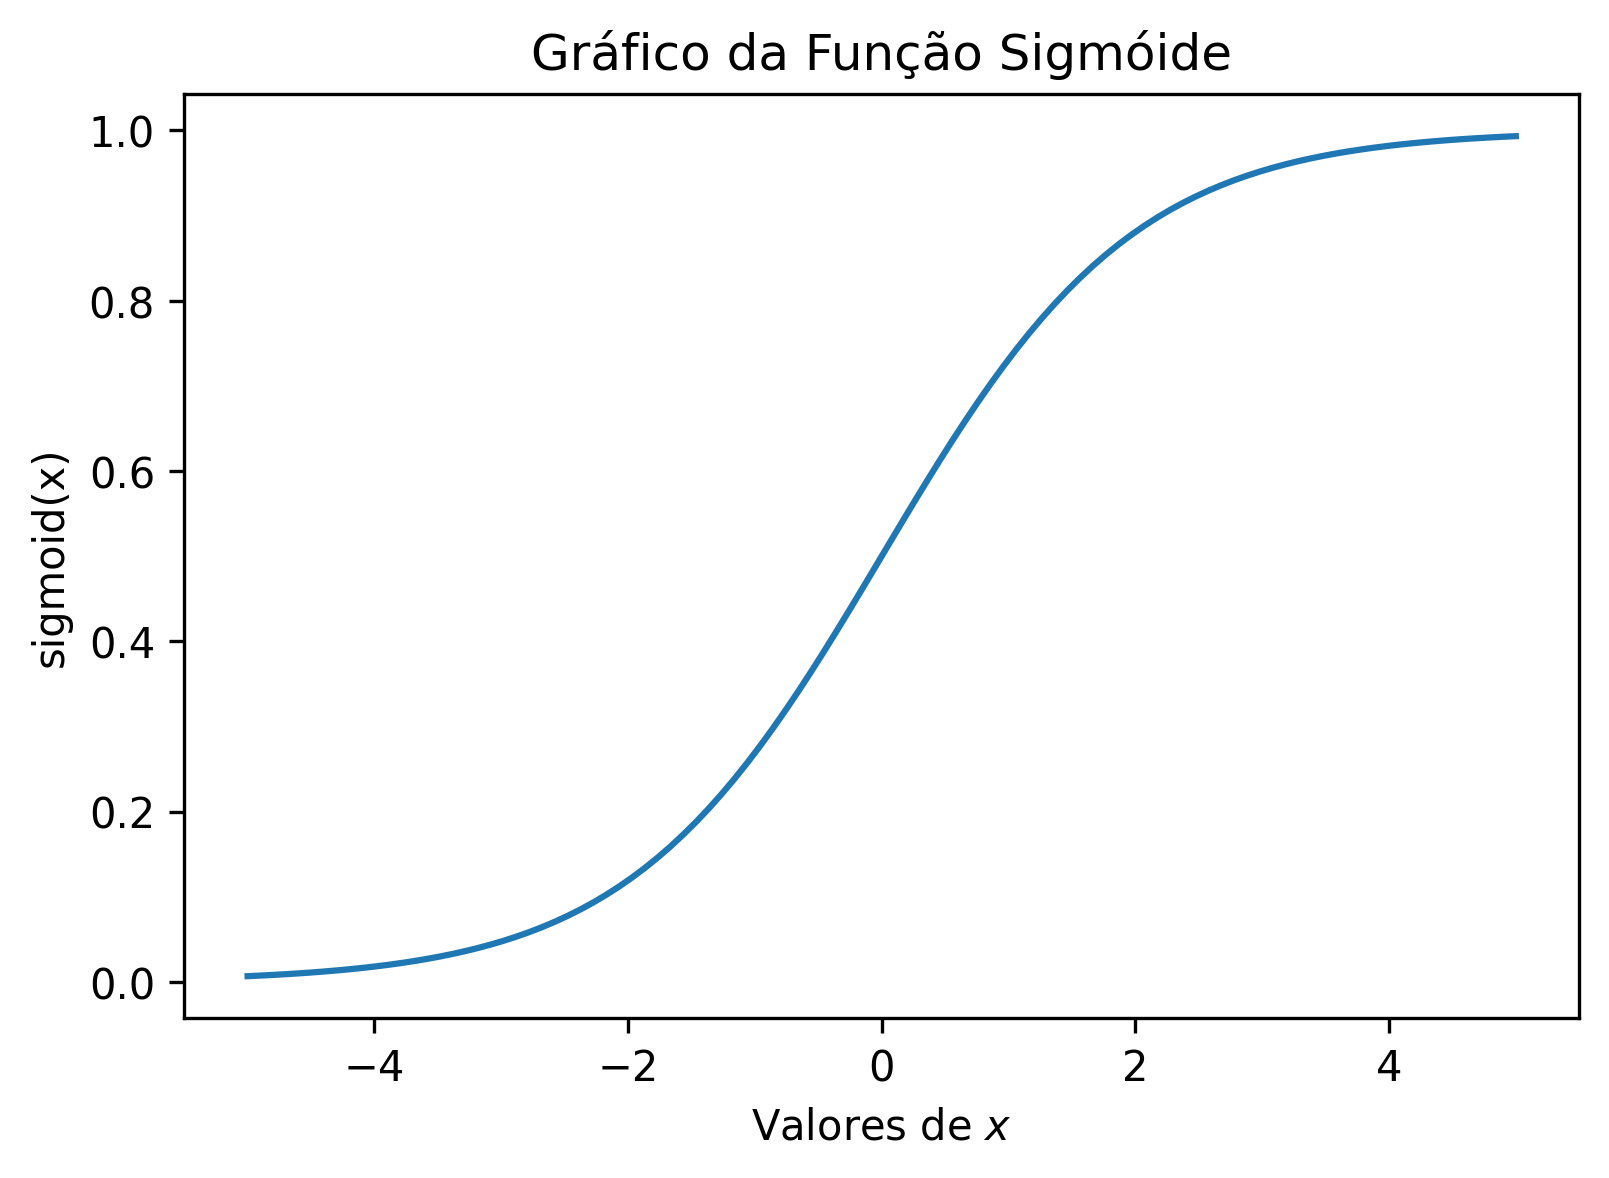


Treinando modelo com ativação: sigmoid


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 61ms/step - accuracy: 0.3291 - loss: 1.8783 - val_accuracy: 0.9215 - val_loss: 0.2957
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9276 - loss: 0.2552 - val_accuracy: 0.9581 - val_loss: 0.1466
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.9587 - loss: 0.1439 - val_accuracy: 0.9695 - val_loss: 0.0993
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9699 - loss: 0.1025 - val_accuracy: 0.9748 - val_loss: 0.0844
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 58ms/step - accuracy: 0.9761 - loss: 0.0790 - val_accuracy: 0.9790 - val_loss: 0.0660
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9748 - loss: 0.0776
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Visualização dos gradientes com a função de ativação: sigmoid

Gradientes (última camada):
Variável: kernel, Gradiente médio: -4.5413063531896114e-08
Variável: bias, Gradiente médio: -7.748603536583687e-08

Matriz de confusão para sigmoi

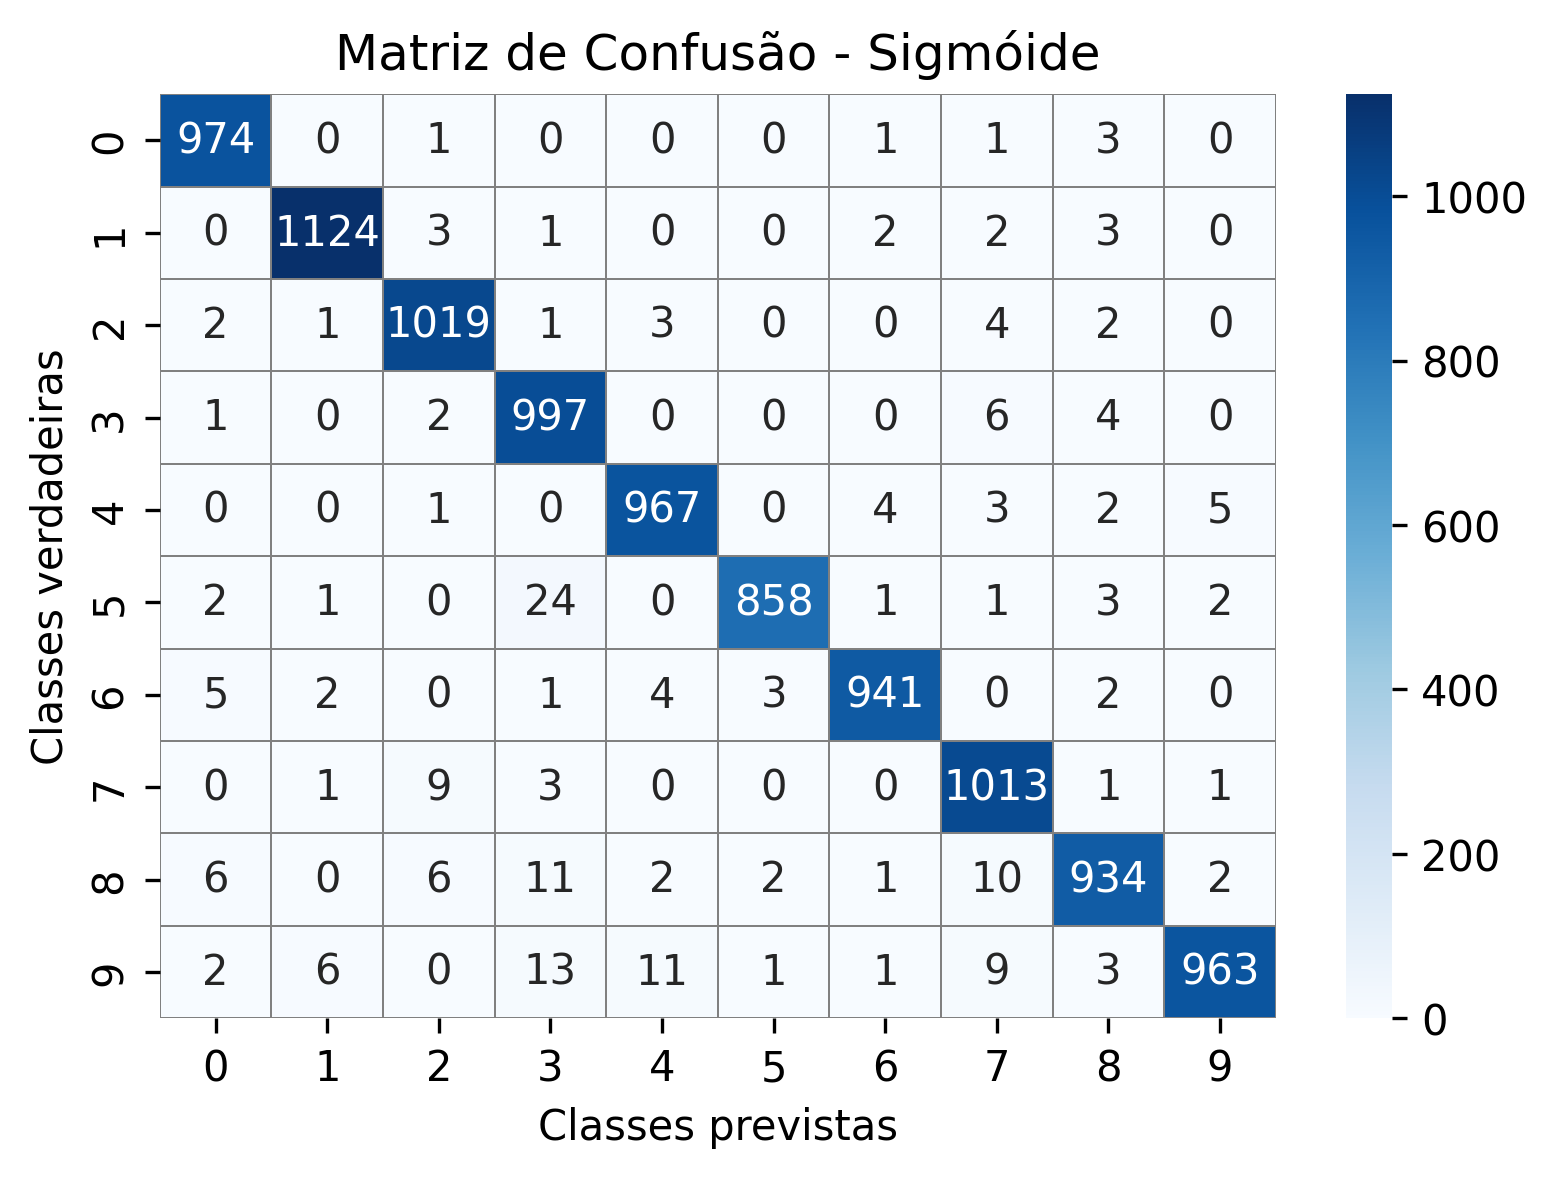

In [ ]:
y = sigmoid(x)
plot_function(x, y, 'Sigmóide', 'sigmoid(x)')
results = run_experiment(activation_functions[1], results, 'Sigmóide')

Teste da função de tangente hiperbólica

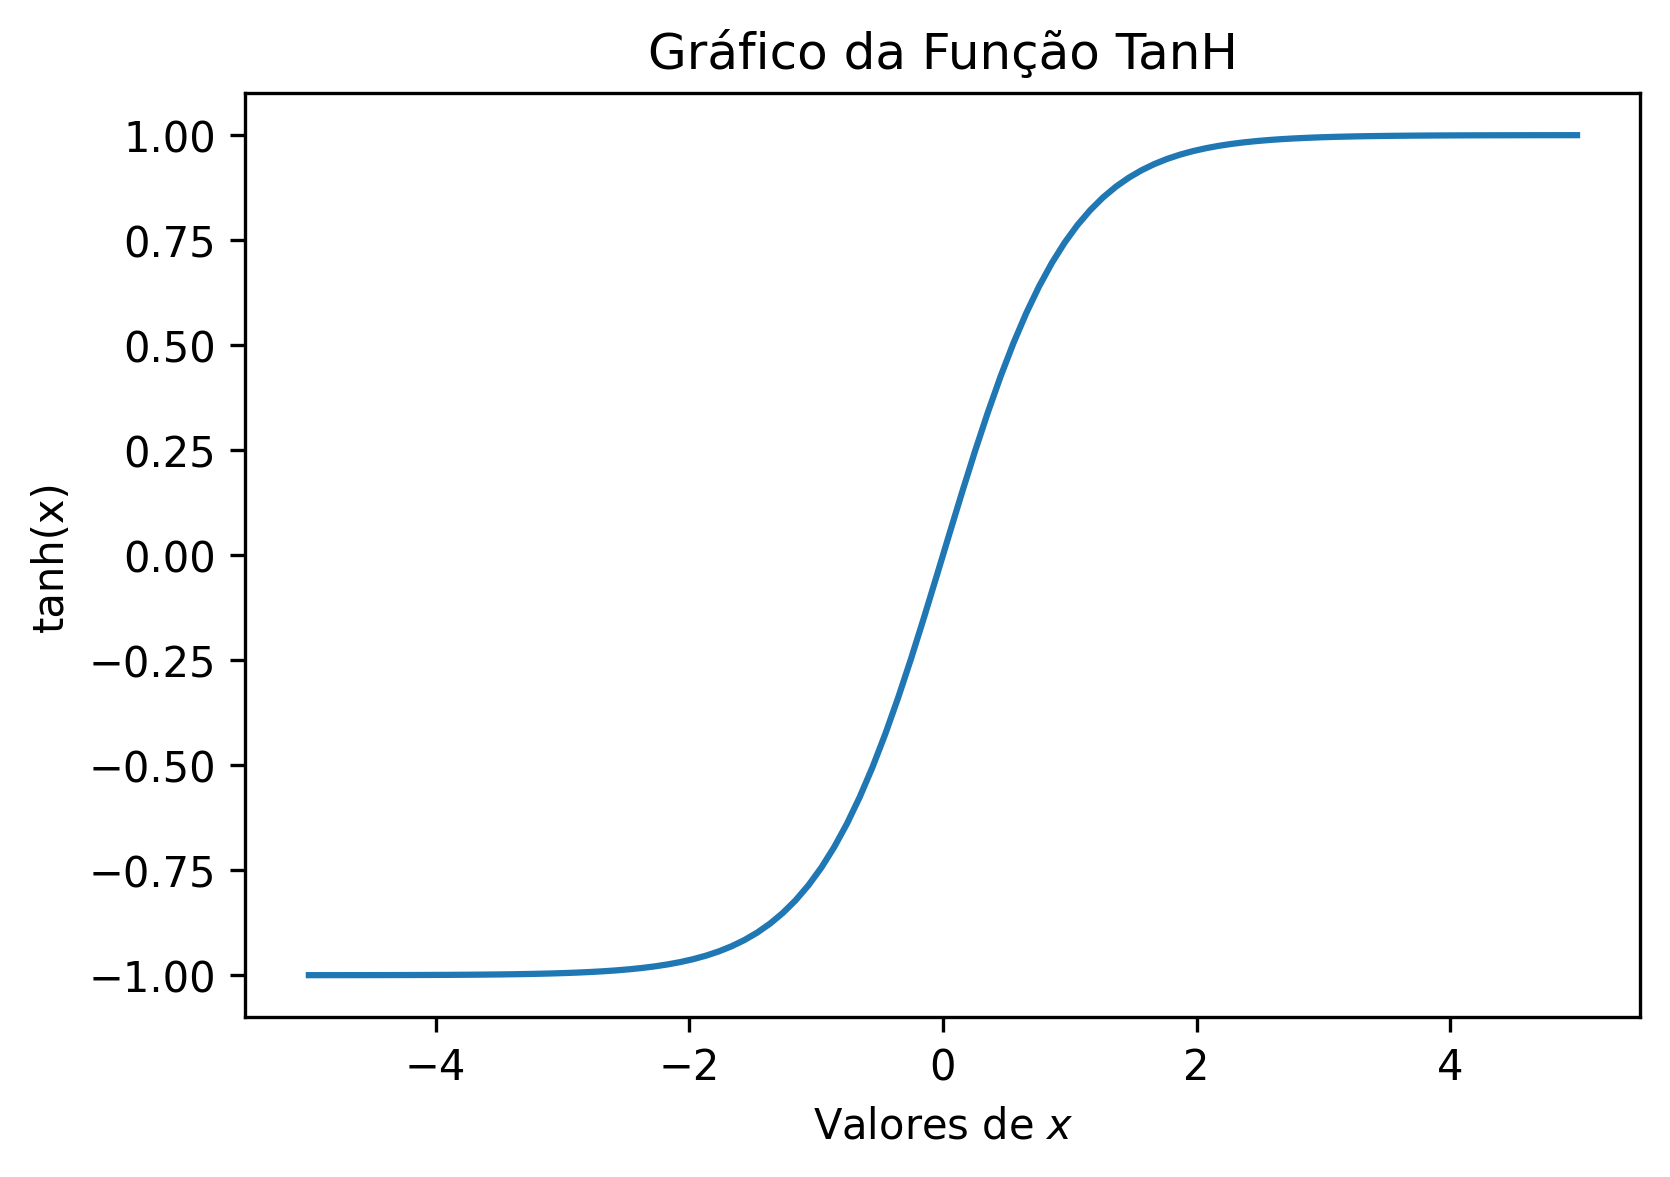


Treinando modelo com ativação: tanh


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.8588 - loss: 0.4944 - val_accuracy: 0.9741 - val_loss: 0.0822
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.9772 - loss: 0.0734 - val_accuracy: 0.9794 - val_loss: 0.0654
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 35s 59ms/step - accuracy: 0.9864 - loss: 0.0483 - val_accuracy: 0.9845 - val_loss: 0.0513
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 44s 64ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9867 - val_loss: 0.0450
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.9917 - loss: 0.0275 - val_accuracy: 0.9885 - val_loss: 0.0382
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9859 - loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step

Visualização dos gradientes com a função de ativação: tanh

Gradientes (última camada):
Variável: kernel, Gradiente médio: 2.9092743769609797e-09
Variável: bias, Gradiente médio: 2.6822089438383045e-08

Matriz de confusão para tanh:


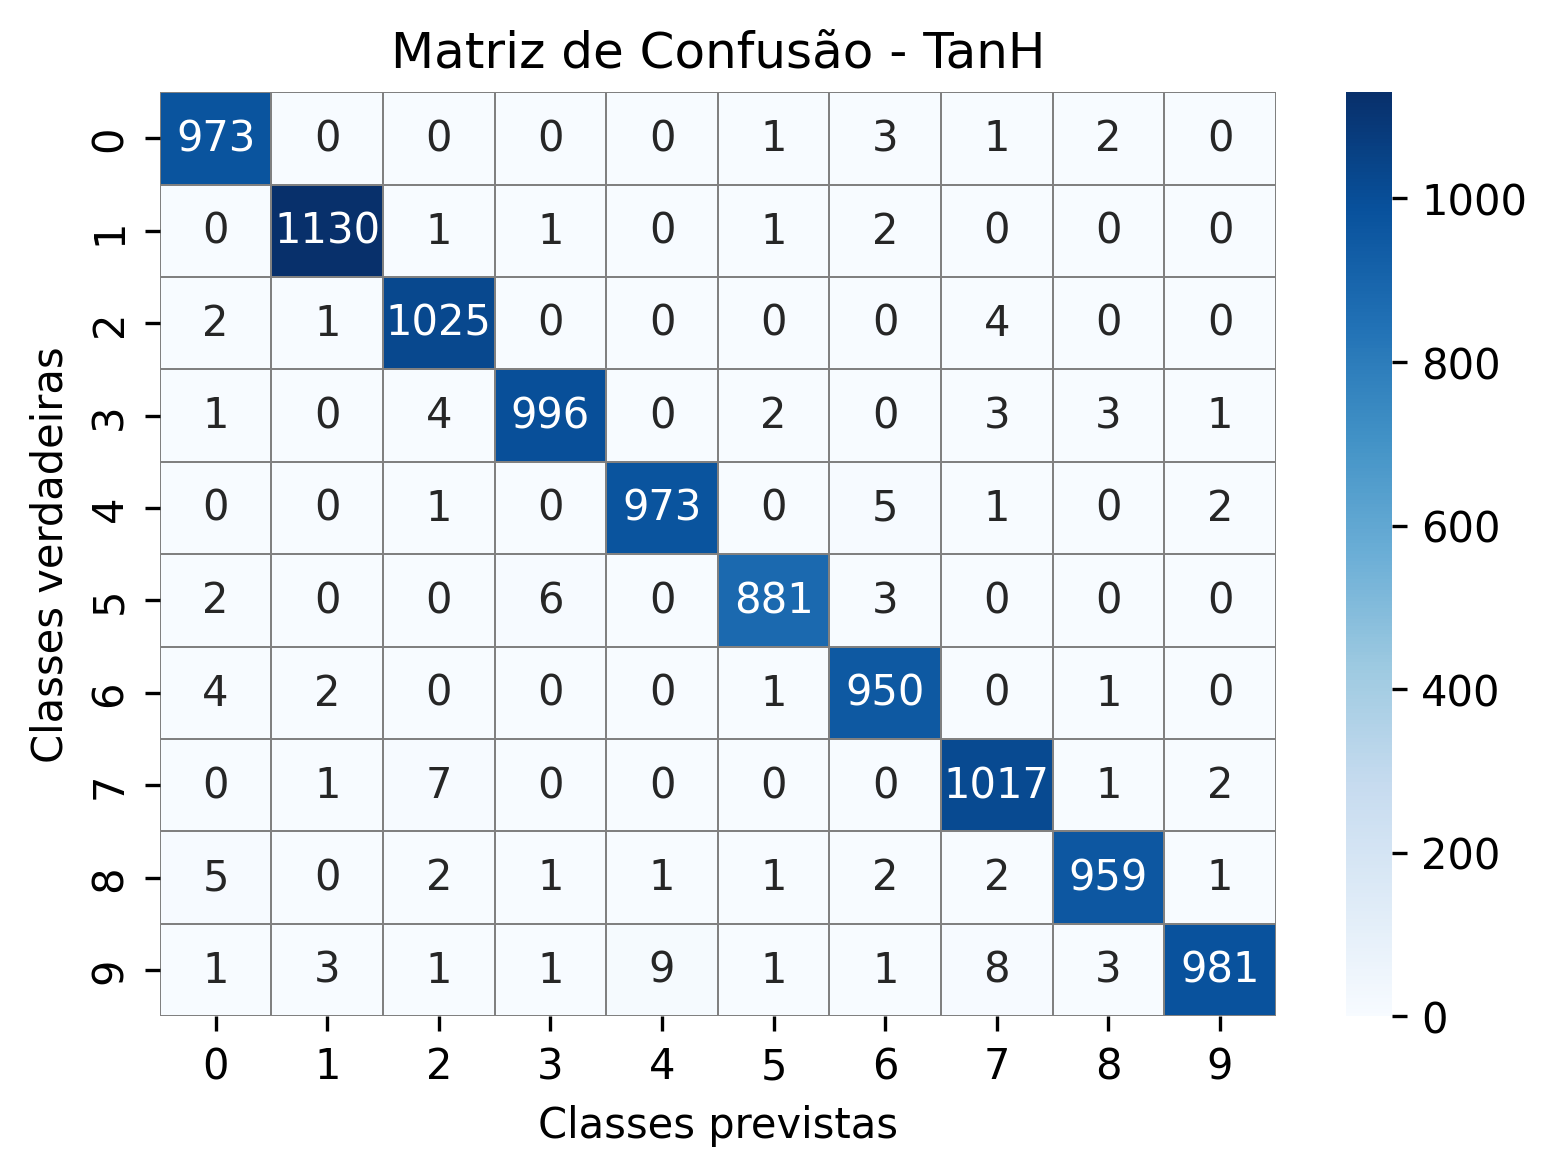

In [ ]:
y = tanh(x)
plot_function(x, y, 'TanH', 'tanh(x)')
results = run_experiment(activation_functions[2], results, 'TanH')

In [ ]:
print("\nResultados de precisão para cada função de ativação:")
for activation_func, accuracy in results.items():
    print(f"{activation_func}: {accuracy:.4f}")


Resultados de precisão para cada função de ativação:
relu: 0.9871
sigmoid: 0.9790
tanh: 0.9885


## VII. Gradiente descendente

Precisão do modelo para 2 vs 7: 96.29%


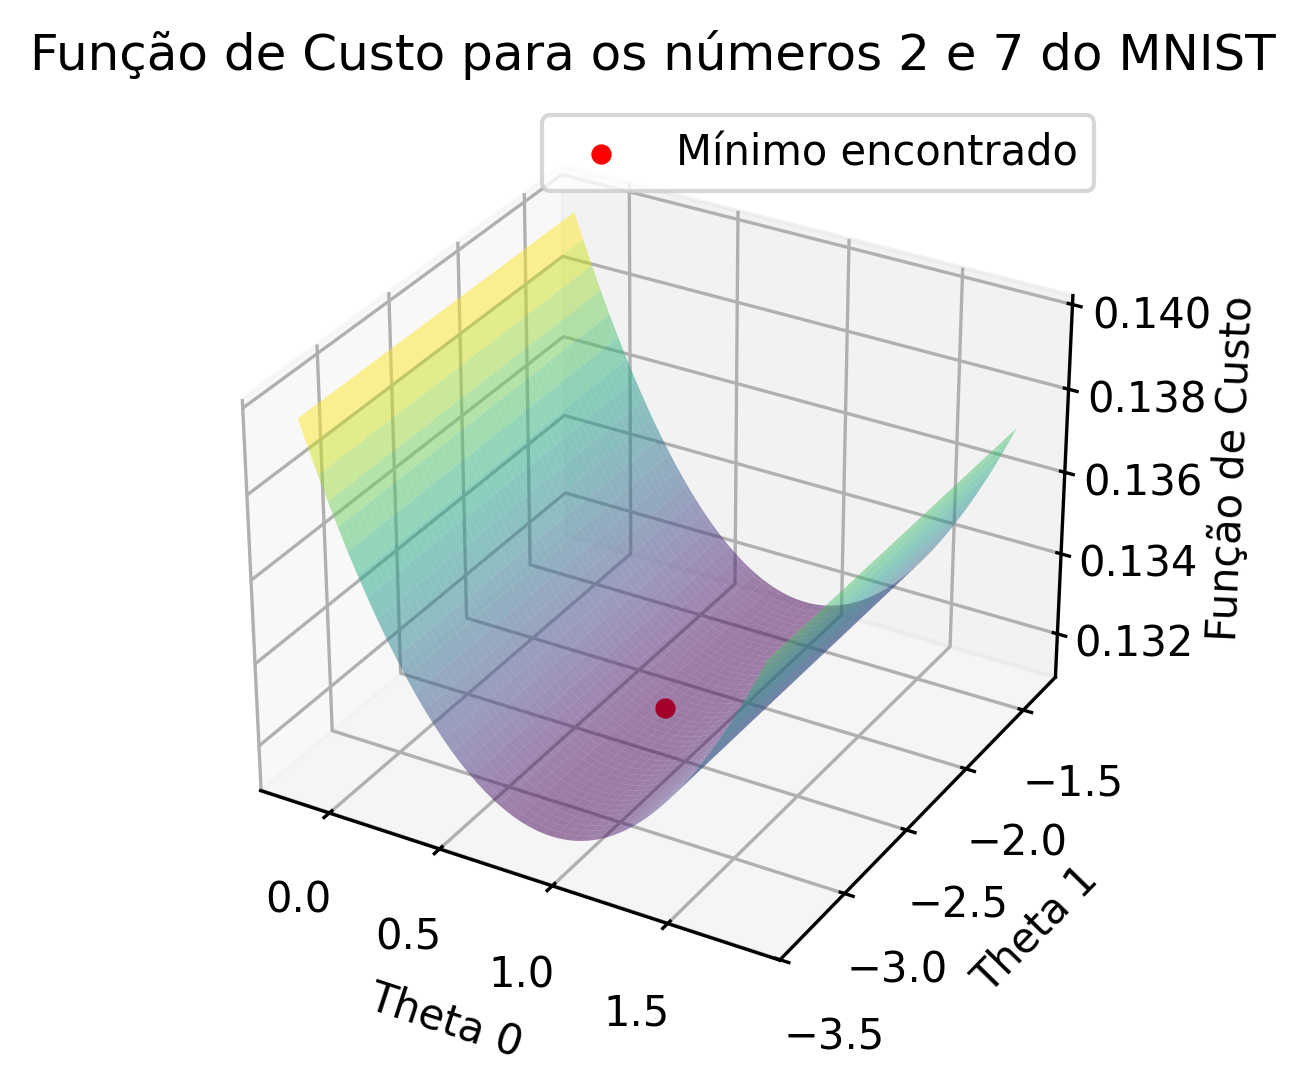

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)
X = X / 255.0

A, B = 2, 7  # alterar aqui para mudar os números do MNIST
mask = (y == A) | (y == B)
X, y = X[mask], y[mask]

y = (y == B).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_aug = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_aug = np.c_[np.ones(X_test.shape[0]), X_test]

theta = np.random.randn(X_train_aug.shape[1])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))

    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon)

    return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(X, y, theta, learning_rate=0.1, max_iter=1000, precision=1e-4):
    m = len(y)
    costs = []
    history = [theta]

    for i in range(max_iter):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient
        costs.append(cost_function(X, y, theta))

        if i > 0 and abs(costs[-1] - costs[-2]) < precision:
            break

        history.append(theta)

    return theta, costs, history

theta_final, costs, history = gradient_descent(X_train_aug, y_train, theta, learning_rate=0.1, max_iter=1000)
y_pred = sigmoid(X_test_aug.dot(theta_final)) >= 0.5
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisão do modelo para {A} vs {B}: {accuracy * 100:.2f}%')

theta0_vals = np.linspace(theta_final[0] - 1, theta_final[0] + 1, 100)
theta1_vals = np.linspace(theta_final[1] - 1, theta_final[1] + 1, 100)
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

Z = np.zeros(Theta0.shape)
for i in range(Theta0.shape[0]):
    for j in range(Theta0.shape[1]):
        temp_theta = np.copy(theta_final)
        temp_theta[0] = Theta0[i, j]
        temp_theta[1] = Theta1[i, j]
        Z[i, j] = cost_function(X_train_aug, y_train, temp_theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Theta0, Theta1, Z, cmap='viridis', alpha=0.5, edgecolor='none')

ax.scatter(theta_final[0], theta_final[1], cost_function(X_train_aug, y_train, theta_final),
           color='red', s=15, marker='o', label='Mínimo encontrado')

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Função de Custo')
#ax.set_title(f'Superfície da Função de Custo (utilizando {A} e {B}, do MNIST)')
ax.set_title(f'Função de Custo para os números {A} e {B} do MNIST')

ax.legend()
plt.savefig('gradiente_descendente.pdf', bbox_inches='tight')
plt.show()

## VIII. Referências

[1] I. Goodfellow, Y. Bengio, and A. Courville, Deep Learning.
Cambridge, MA: MIT Press, 2016.

[2] S. Haykin, Neural Networks and Learning Machines. Pearson
Education: Pearson, 2009.

[3] D. E. Rumelhart, G. E. Hinton, and R. J. Williams, “Learning
representations by back-propagating errors,” Nature, vol. 323, no. 6088,
pp. 533–536, 1986.

[4] C. M. Bishop, Pattern Recognition and Machine Learning. New York:
Springer, 2006.

[5] V. Nair and G. E. Hinton, “Rectified linear units improve
restricted boltzmann machines,” Proceedings of the 27th International
Conference on Machine Learning (ICML-10), 2010. [Online].
Available: https://www.cs.toronto.edu/~hinton/absps/reluICML.pdf

[6] F. Rosenblatt, Principles of Neurodynamics: Perceptrons and the
Theory of Brain Mechanisms. New York: Spartan Books, 1986.

[7] D. C. Montgomery, E. A. Peck, and G. G. Vining, Introduction to Linear
Regression Analysis, 5th ed. New York: Wiley, 2012.

[8] N. R. Draper and H. Smith, Applied Regression Analysis, 3rd ed. New
York: Wiley, 1998.

[9]  Le Cun, Y., Boser, B., Denker, J. S., Henderson, D., Howard, R. E., Hubbard, W., & Jackel, L. D. (1989, January). Handwritten digit recognition with a back-propagation network. In Proceedings of the 2nd International Conference on Neural Information Processing Systems (pp. 396–404).